In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
infoplay = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore.csv")
inforeviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore_user_reviews.csv")

In [ ]:
infoplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
distribution = infoplay[['Rating','Type']]

In [ ]:
distribution['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
#Siendo que es una escala del 1 al 5, el 19 pasa a ser 1.9 ya que se lo ha considerado como un probable error de sintaxis.
#Se dropean las filas que tienen nan porque resultan inconsistentes para nuestro analisis ya que no sabemos que valor deben contener. Completarlas aleatoriamente unicamente quitaria veracidad a nuestro analisis
distribution = distribution.dropna(subset='Rating')
indexbuscado = distribution[distribution['Rating'] == 19].index
indexbuscado

Int64Index([10472], dtype='int64')

In [ ]:
distribution.loc[indexbuscado,'Rating'] = 1.9
distribution['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
distribution['Type'] = distribution['Type'].str.replace('0','Free')
distribution = distribution.dropna(subset=['Type'])
distribution['Type'] = distribution['Type'].replace({'Free': 'Gratuita', 'Paid': 'Paga'}, regex=True)

In [ ]:
distribution['Rating'].describe()

count    9367.000000
mean        4.191513
std         0.515735
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

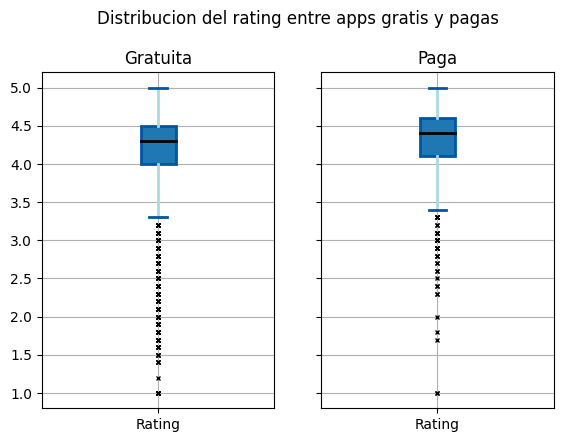

In [ ]:
boxprops = dict(linestyle='-', linewidth=2, color='#0055A4')
medianprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='-', linewidth=2, color='lightblue')
capprops = dict(linestyle='-', linewidth=2, color='#0055A4')
flierprops = dict(marker='x', markersize=3)

ax = distribution.groupby('Type').boxplot(
    column='Rating',
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
     flierprops=flierprops,
    showfliers=True,
    grid=True,
    patch_artist=True,
)
colors = ['lightblue']

plt.suptitle('Distribucion del rating entre apps gratis y pagas')
plt.subplots_adjust(top=0.85)

plt.show()